# Supervised learning (nadgledano učenje)

In [52]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import seaborn
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('updated_pollution_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [54]:
df.drop_duplicates(keep='first',inplace=True)
df.isnull().any()

Temperature                      False
Humidity                         False
PM2.5                            False
PM10                             False
NO2                              False
SO2                              False
CO                               False
Proximity_to_Industrial_Areas    False
Population_Density               False
Air Quality                      False
dtype: bool

Dataset nema duplikata ni nedostajućih vrednosti

## Opis karakteristika

| Karakteristika | Opis
| -------- | ------- |
| Temparatura (°C) | Prosečna temperatura vazduha |
| Vlažnost (%) | Relativna vlažnost vazduha |
| PM2.5 (µg/m³)  | Nivo prisutnosti sitnih čestica   |
| PM10 (µg/m³)  | Nivo prisutnosti krupnih čestica    |
| NO2  (ppb)  |   Koncentracija azot-dioksida  |
| S02 (ppb)   | Koncentracija sumpor-dioksida   |
| CO (ppb)   | Koncentracija ugljen-monoksida    |
| Blizina_industrije   (km) |  Daljina do najbliže industrijske zone   |
| Gustina_populacije (people/km²)   | Broj ljudi po kvadratnom kilometru    |
| Kvalitet_vazduha | Stepen zagađenosti vazduha |

## Kvalitet vazduha
* Dobar: Čist vazduh sa niskim nivoima zagađenja 
* Umeren: Prihvatljiv kvalitet vazduha, ali su prisutni neki zagađivači
* Loš: Uočljivo zagađenje koje može izazvati zdravstvene probleme kod osetljivih grupa
* Opasan: Veoma zagađen vazduh koji predstavlja ozbiljan zdravstveni rizik za populaciju

In [55]:
df = df.rename(columns={
    'Temperature':'Temperatura',
    'Humidity':'Vlažnost',
    'Air Quality': 'Kvalitet_Vazduha',
    'Proximity_to_Industrial_Areas': 'Blizina_Industrije',
    'Population_Density':'Gustina_Populacije'
})
df['Kvalitet_Vazduha'] = df['Kvalitet_Vazduha'].replace({
    'Good': 'Dobar',
    'Moderate': 'Umeren',
    'Poor': 'Loš',
    'Hazardous': 'Opasan'
})

if df['Kvalitet_Vazduha'].dtype == 'object': 
    encoder = LabelEncoder()
    df['Kvalitet_Vazduha'] = encoder.fit_transform(df['Kvalitet_Vazduha'])
df.head()

,Temperatura,Vlažnost,PM2.5,PM10,NO2,SO2,CO,Blizina_Industrije,Gustina_Populacije,Kvalitet_Vazduha
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,3
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,3
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,3
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [56]:
class_mapping = {i: class_name for i, class_name in enumerate(encoder.classes_)}
print(class_mapping)

{0: 'Dobar', 1: 'Loš', 2: 'Opasan', 3: 'Umeren'}


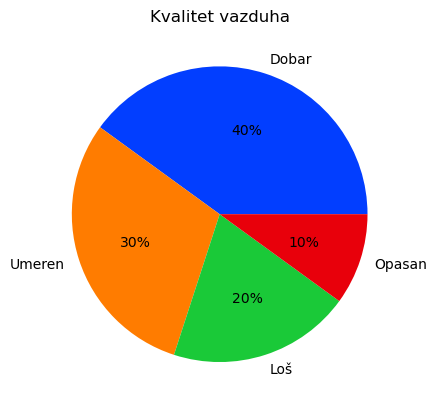

In [57]:
air_quality=df['Kvalitet_Vazduha'].value_counts()
palette_color = seaborn.color_palette('bright') 
plt.pie(air_quality.values, labels=encoder.inverse_transform(air_quality.index), colors=palette_color, autopct='%.0f%%')
plt.title("Kvalitet vazduha") 
plt.show() 

<Axes: >

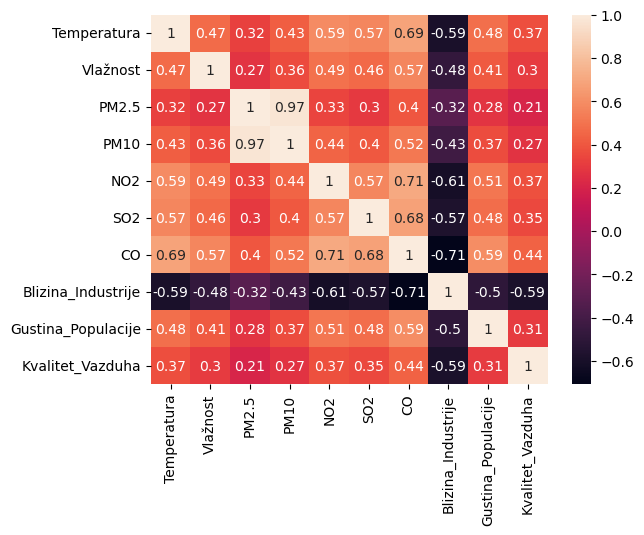

In [58]:
correlation=df.corr()
seaborn.heatmap(correlation,annot=True)

| Karakteristika | Opis
| -------- | ------- |
| Temparatura (°C) | Prosečna temperatura vazduha |
| Vlažnost (%) | Relativna vlažnost vazduha |
| PM2.5 (µg/m³)  | Nivo prisutnosti sitnih čestica   |
| PM10 (µg/m³)  | Nivo prisutnosti krupnih čestica    |
| NO2  (ppb)  |   Koncentracija azot-dioksida  |
| S02 (ppb)   | Koncentracija sumpor-dioksida   |
| CO (ppb)   | Koncentracija ugljen-monoksida    |
| Blizina_industrije   (km) |  Daljina do najbliže industrijske zone   |
| Gustina_populacije (people/km²)   | Broj ljudi po kvadratnom kilometru    |
| Kvalitet_vazduha | Stepen zagađenosti vazduha |

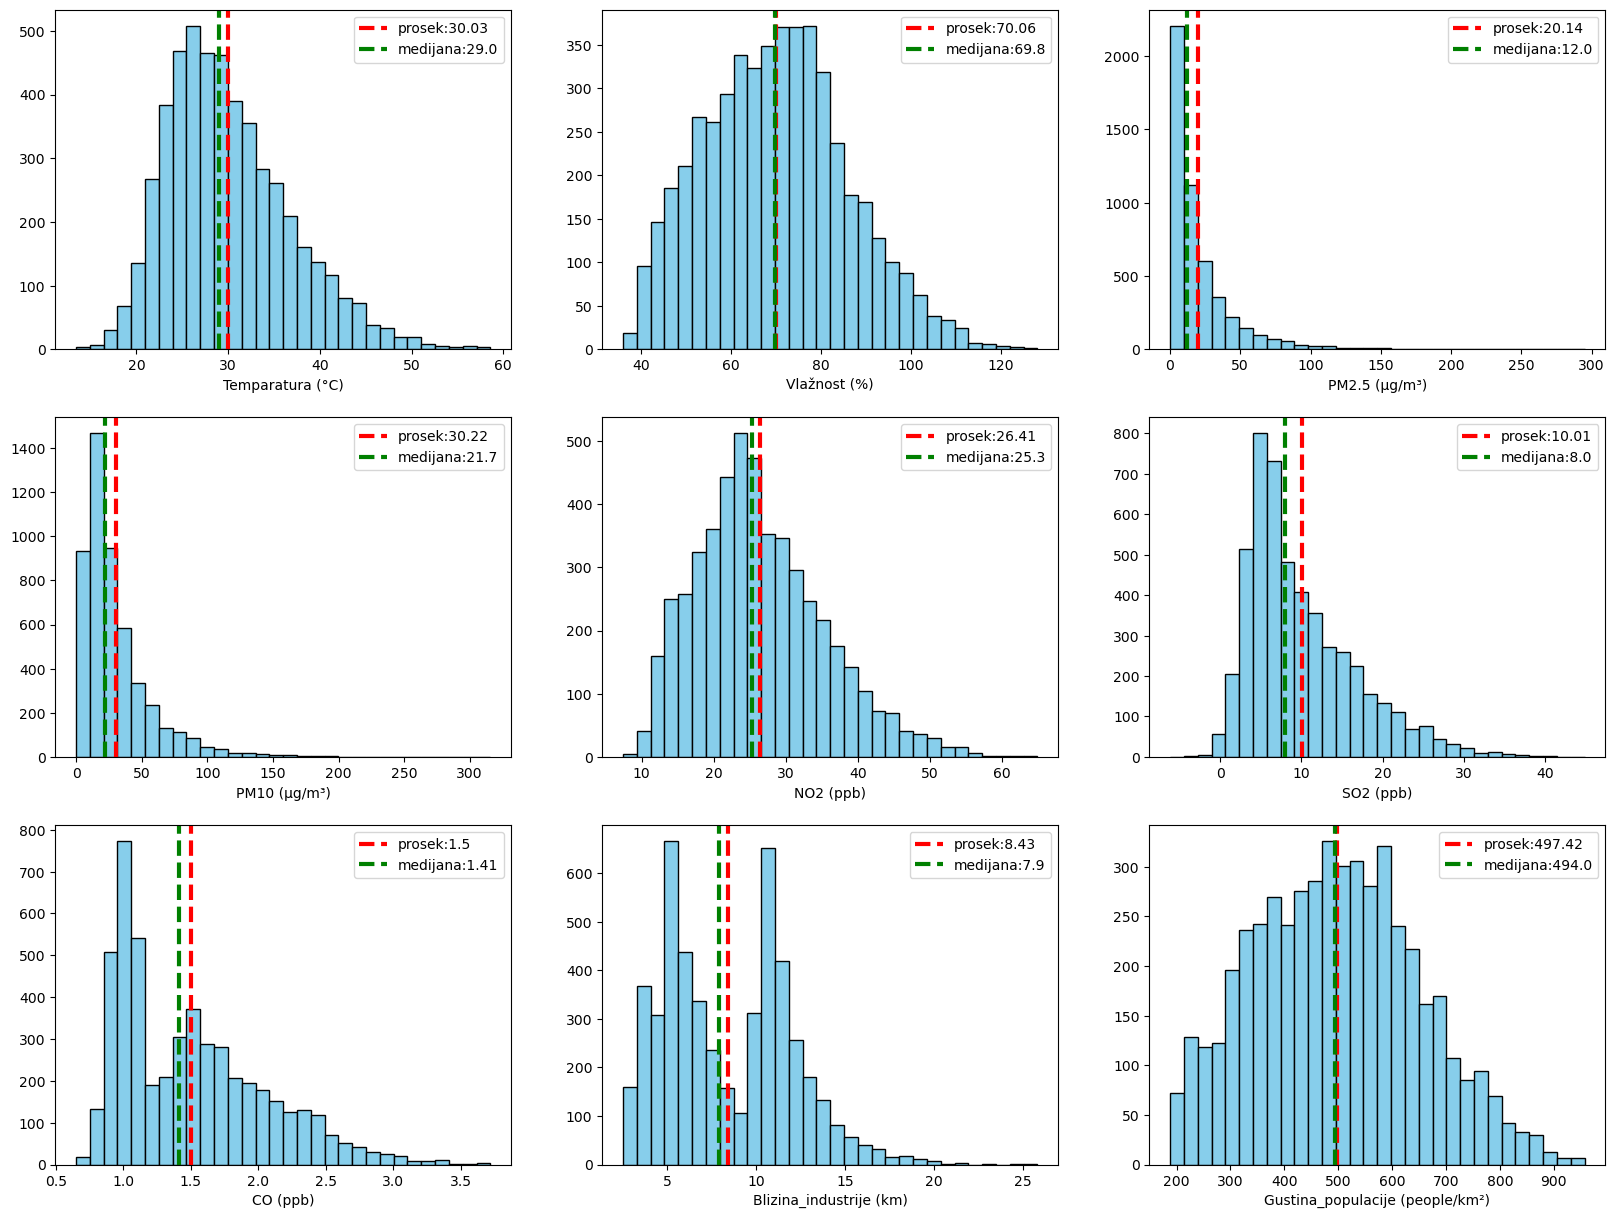

In [59]:
df_simpl=df.drop(columns='Kvalitet_Vazduha')
labels={'Temperatura':'Temparatura (°C)','Vlažnost':'Vlažnost (%)','PM2.5':'PM2.5 (µg/m³)',
        'PM10':'PM10 (µg/m³)','NO2':'NO2 (ppb)', 'SO2':'SO2 (ppb)','CO':'CO (ppb)',
        'Blizina_Industrije':'Blizina_industrije (km)','Gustina_Populacije':'Gustina_populacije (people/km²)',}
plt.figure(figsize=(20,15))
for ind,col in enumerate(df_simpl.columns):
    plt.subplot(3,3,ind+1)
    plt.hist(df_simpl[col], bins=30, color='skyblue', edgecolor='black')
    plt.axvline(np.round(df[col].mean(),2), color='r', linestyle='dashed', linewidth=3)
    plt.axvline(np.round(df[col].median(),2), color='g', linestyle='dashed', linewidth=3)
    plt.xlabel(labels[col])
    plt.legend([f'prosek:{np.round(df[col].mean(),2)}',f'medijana:{np.round(df[col].median(),2)}'])
plt.show()

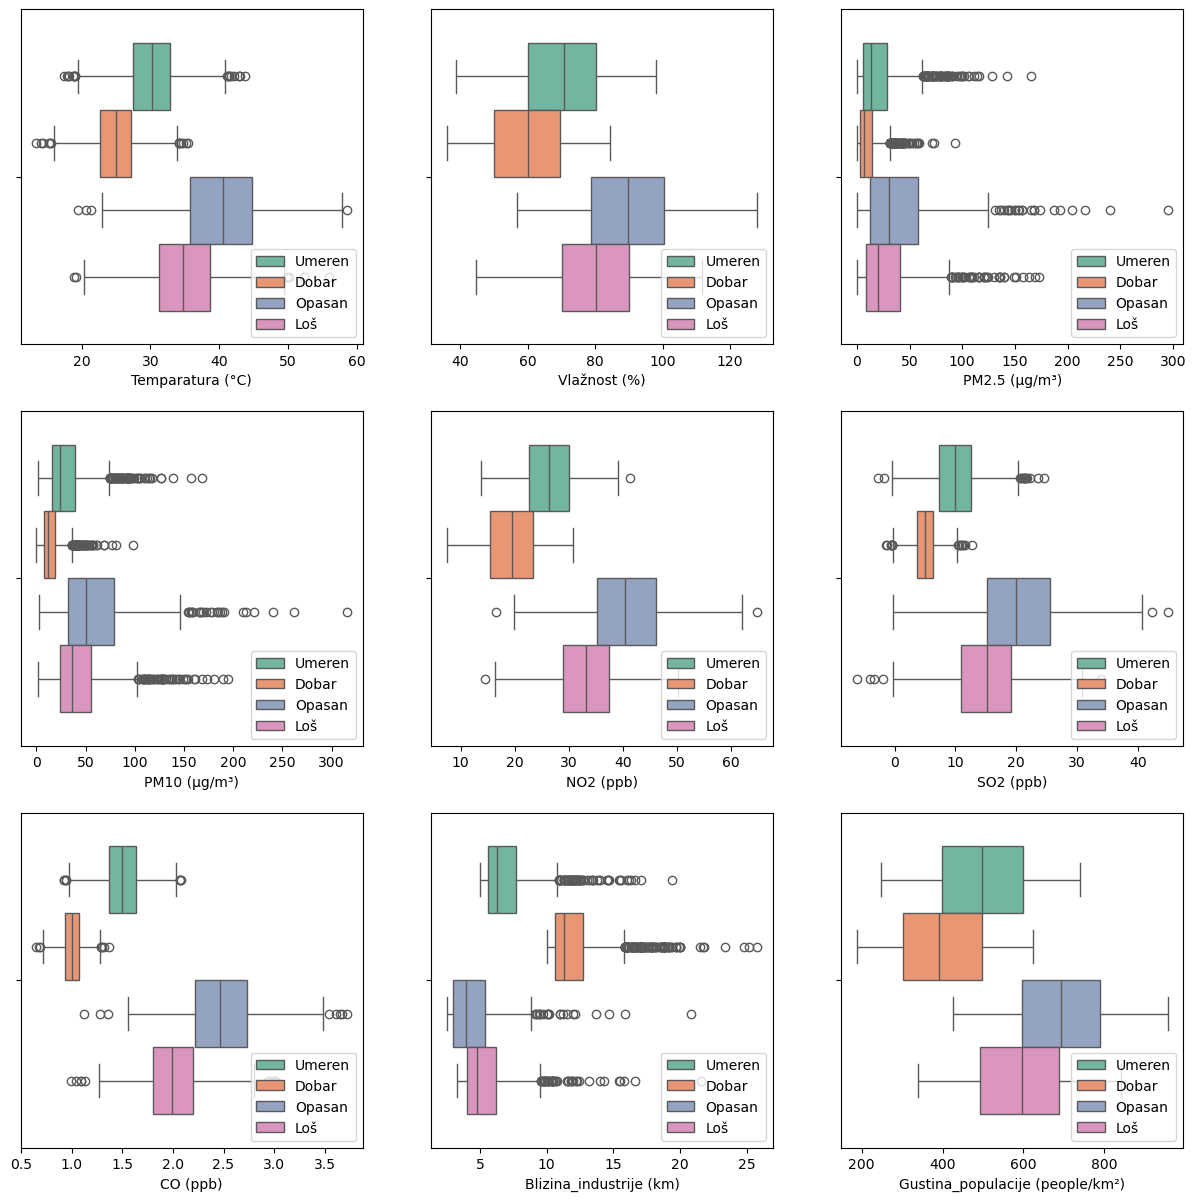

In [60]:
fig = plt.figure(figsize=(15,20))
for i, col in enumerate(df.drop('Kvalitet_Vazduha', axis=1).columns):
  plt.subplot(4,3,i+1)
  seaborn.boxplot(x = df[col],hue=encoder.inverse_transform(df['Kvalitet_Vazduha']),palette='Set2')
  plt.xlabel(labels[col])
  plt.legend(loc='lower right')

#### Outlier removal (IQR)

In [61]:
df.describe()

,Temperatura,Vlažnost,PM2.5,PM10,NO2,SO2,CO,Blizina_Industrije,Gustina_Populacije,Kvalitet_Vazduha
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800,1.300000
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084,1.268985
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000,0.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000,1.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000,3.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000,3.000000


In [62]:
counts = df['Kvalitet_Vazduha'].value_counts().sort_index()
decoded_index = [encoder.classes_[i] for i in counts.index]
counts.index = decoded_index
print(counts)

Dobar     2000
Loš       1000
Opasan     500
Umeren    1500
Name: count, dtype: int64


In [63]:
df_encoded = df.copy()

encoded_labels = encoder.transform(['Dobar', 'Umeren'])

# Filter using encoded values
df_filtered = df_encoded[df_encoded['Kvalitet_Vazduha'].isin(encoded_labels)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperatura         3500 non-null   float64
 1   Vlažnost            3500 non-null   float64
 2   PM2.5               3500 non-null   float64
 3   PM10                3500 non-null   float64
 4   NO2                 3500 non-null   float64
 5   SO2                 3500 non-null   float64
 6   CO                  3500 non-null   float64
 7   Blizina_Industrije  3500 non-null   float64
 8   Gustina_Populacije  3500 non-null   int64  
 9   Kvalitet_Vazduha    3500 non-null   int32  
dtypes: float64(8), int32(1), int64(1)
memory usage: 287.1 KB


In [64]:
encoded_labels = encoder.transform(['Dobar', 'Umeren'])

df_filtered = df[df['Kvalitet_Vazduha'].isin(encoded_labels)]
df_original=df[~df['Kvalitet_Vazduha'].isin(encoded_labels)]

for col in df_filtered.columns:
    Q1=np.quantile(df_filtered[col],0.25)
    Q3=np.quantile(df_filtered[col],0.75)
    IQR=Q3-Q1
    low_lim=Q1-IQR*1.5
    up_lim=Q3+IQR*1.5
    df_filtered=df_filtered[(df_filtered[col]>=low_lim)&(df_filtered[col]<=up_lim)]

for part, name in zip([df_filtered, df_original], ['Filtered', 'Original']):
    counts = part['Kvalitet_Vazduha'].value_counts().sort_index()
    decoded_index = encoder.inverse_transform(counts.index)
    counts.index = decoded_index
    print(f"{name} counts:\n{counts}\n")

df = pd.concat([df_filtered, df_original], ignore_index=True)

df.info()

Filtered counts:
Dobar     1950
Umeren    1124
Name: count, dtype: int64

Original counts:
Loš       1000
Opasan     500
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4574 entries, 0 to 4573
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperatura         4574 non-null   float64
 1   Vlažnost            4574 non-null   float64
 2   PM2.5               4574 non-null   float64
 3   PM10                4574 non-null   float64
 4   NO2                 4574 non-null   float64
 5   SO2                 4574 non-null   float64
 6   CO                  4574 non-null   float64
 7   Blizina_Industrije  4574 non-null   float64
 8   Gustina_Populacije  4574 non-null   int64  
 9   Kvalitet_Vazduha    4574 non-null   int32  
dtypes: float64(8), int32(1), int64(1)
memory usage: 339.6 KB


In [65]:
df.describe()

,Temperatura,Vlažnost,PM2.5,PM10,NO2,SO2,CO,Blizina_Industrije,Gustina_Populacije,Kvalitet_Vazduha
count,4574.000000,4574.000000,4574.000000,4574.00000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000
mean,30.035724,70.195562,18.187648,28.26655,26.499191,9.937429,1.505682,8.467337,497.675776,1.174464
std,6.852817,16.100012,23.396596,26.54155,9.156225,6.874975,0.565051,3.579890,155.880639,1.220029
min,15.300000,36.000000,0.000000,-0.20000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.000000
25%,24.900000,58.300000,4.300000,11.80000,19.800000,5.000000,1.020000,5.300000,379.000000,0.000000
50%,28.900000,69.950000,11.000000,20.60000,25.200000,7.800000,1.390000,8.350000,494.000000,1.000000
75%,34.100000,80.400000,22.675000,34.20000,32.300000,13.600000,1.887500,11.100000,601.000000,2.000000
max,58.600000,128.100000,295.000000,315.80000,64.900000,44.900000,3.720000,21.600000,957.000000,3.000000


#### Pomoćne funkcije

In [66]:
from sklearn.metrics import confusion_matrix
from IPython.display import display_html

def createConfusionMatrix(target_test,target_predicted):
    matrix = confusion_matrix(np.asarray(target_test),np.asarray(target_predicted))
    class_names=encoder.inverse_transform([0,1,2,3])
    dataframe=pd.DataFrame(matrix,index=class_names,columns=class_names)

    seaborn.heatmap(data=dataframe,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.ylabel("True class")
    plt.xlabel("Predicted class")
    plt.show()
    return dataframe

def createTableReport(report_dict:dict):
    accuracy = report_dict.pop('accuracy')
    df_report = pd.DataFrame(report_dict).transpose()
    
    accuracy_row = pd.Series({'precision': None, 'recall': None, 'f1-score': accuracy, 'support': None}, name='accuracy')
    df_report = pd.concat([df_report, accuracy_row.to_frame().transpose()])
    df_report.round(4)

    return df_report

def showReports(dfs,titles):
    htmls = []
    for df, title in zip(dfs, titles):
        html = f"<h4>{title}</h4>" + df.to_html()
        htmls.append(html)

    display_html(''.join(
        f'<div style="display:inline-block; vertical-align:top;text-align:center; padding:6px;">{html}</div>'
        for html in htmls
    ), raw=True)

## Modeli bez transformacije

### Dummy Classification Model

,precision,recall,f1-score,support
Dobar,0.401163,0.424180,0.412351,488.0
Loš,0.216667,0.208000,0.212245,250.0
Opasan,0.095238,0.080000,0.086957,125.0
Umeren,0.240283,0.241993,0.241135,281.0
macro avg,0.238338,0.238543,0.238172,1144.0
weighted avg,0.287901,0.294580,0.291011,1144.0
accuracy,NaN,NaN,0.294580,NaN


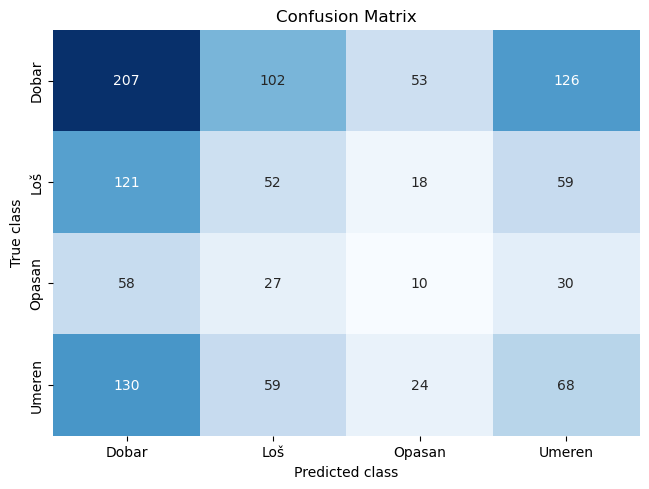

In [67]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

features,target=df.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target) #train_size 0.25
dummy=DummyClassifier(strategy='stratified',random_state=0)
target_predicted=dummy.fit(features_train,target_train).predict(features_test)

report_dummy = createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_dummy)
conf_matrix_dummy=createConfusionMatrix(target_test,target_predicted)

* Preciznost, odziv i F1 su veoma niski za sve klase skupa podataka
* Veliki broj pogrešno identifikovanih klasa, uz nagađenje da nijedna predikcija za klasu "Opasan" nije bila tačna
* *Zaključak:* Ne koristiti ovaj model, služi samo kao standard za poređenje

### Logistic regression

,precision,recall,f1-score,support
Dobar,0.973843,0.991803,0.982741,488.0
Loš,0.606965,0.488000,0.541020,250.0
Opasan,0.520000,0.728000,0.606667,125.0
Umeren,0.811808,0.782918,0.797101,281.0
macro avg,0.728154,0.747680,0.731882,1144.0
weighted avg,0.804279,0.801573,0.799521,1144.0
accuracy,NaN,NaN,0.801573,NaN


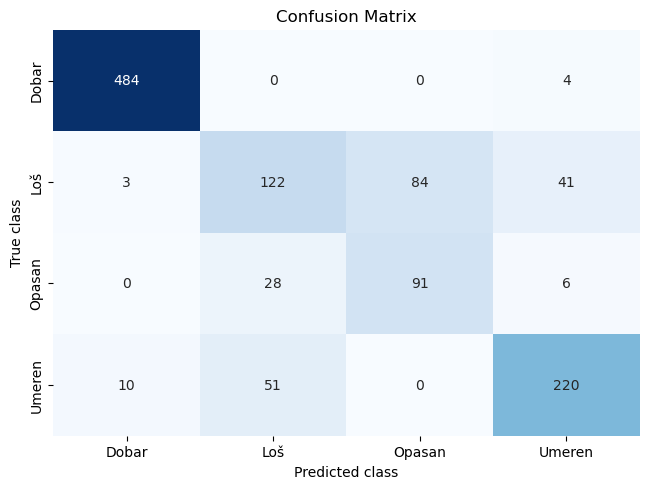

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features,target=df.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target) 

# Fit logistic regression (multi-class)
model = LogisticRegression(solver='saga', max_iter=5000,class_weight='balanced',random_state=0)
model.fit(features_train, target_train)

# Predictions
target_pred = model.predict(features_test)

# Evaluation
report_lr=createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_,output_dict=True))
display(report_lr)
conf_matrix_lr = createConfusionMatrix(target_test,target_pred)

* Odlična preciznost i odziv za klase "Dobar" i "Umeren"
* Nedovoljno velika preciznost za klasu "Opasan" (značajan broj lažno pozitivnih predviđanja)
* *Zaključak:* Bolja predikcija pojedinih klasa, dok se to ne može reći za ključnu "Opasan" klasu

### Random forest model

,precision,recall,f1-score,support
Dobar,0.997955,1.000000,0.998976,488.0
Loš,0.907692,0.944000,0.925490,250.0
Opasan,0.903509,0.824000,0.861925,125.0
Umeren,0.989324,0.989324,0.989324,281.0
macro avg,0.949620,0.939331,0.943929,1144.0
weighted avg,0.965790,0.965909,0.965571,1144.0
accuracy,NaN,NaN,0.965909,NaN


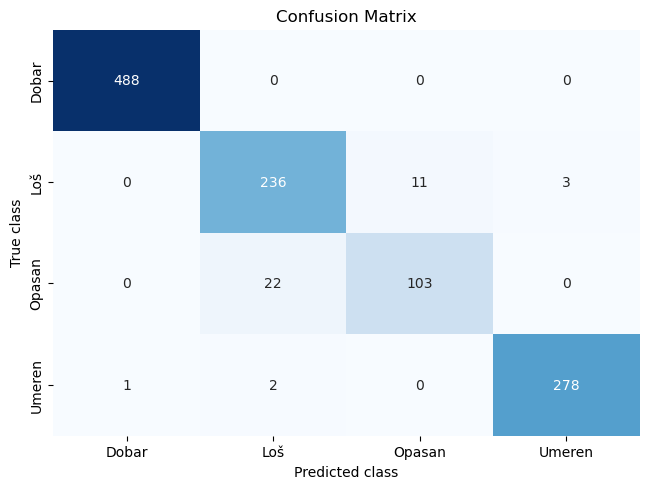

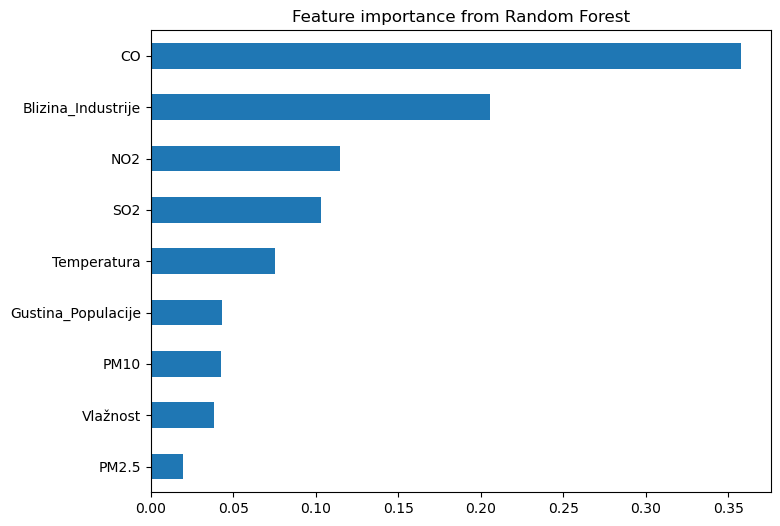

In [69]:
from sklearn.ensemble import RandomForestClassifier

features,target=df.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=0
)
rf.fit(features_train, target_train)
target_predicted = rf.predict(features_test)

report_rf=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_rf)
conf_matrix_rf=createConfusionMatrix(target_test,target_predicted)

feat_importance = pd.Series(rf.feature_importances_, index=features_train.columns)
feat_importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature importance from Random Forest')
plt.show()

* Visoka vrednost F1 za većinu klasa
* Nizak odziv za klasu "Opasan", s time da je pogrešna predikcija bila klasa "Loš"
* Na osnovu analize karakteristika koje su najviše uticale na stablo odlučivanja možemo videti da se tu izdvojile CO i Blizina Industrije, kao neke osobine koje smo i očekivale da se pojave
* *Zaključak:* Najbolje ukupne metrike nekog modela, bez skaliranja ulaznog skupa podataka

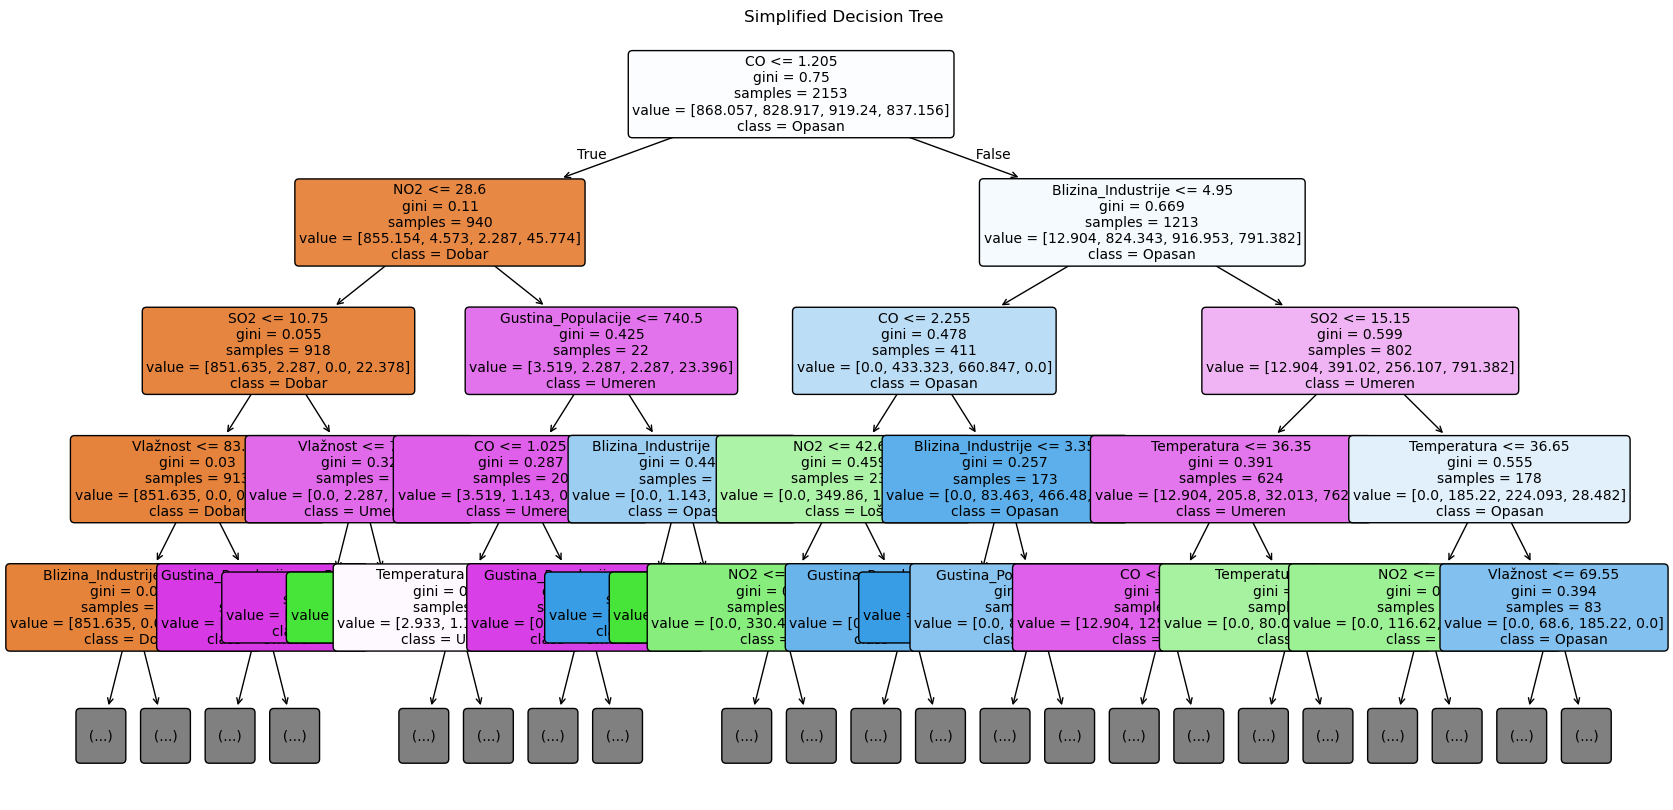

In [70]:
from sklearn.tree import plot_tree
estimator = rf.estimators_[1]

plt.figure(figsize=(20,10))
plot_tree(estimator,
          feature_names=features.columns,
          class_names=encoder.classes_,
          max_depth=4,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Simplified Decision Tree")
plt.show()

### Support Vector Machine

,precision,recall,f1-score,support
Dobar,0.830420,0.973361,0.896226,488.0
Loš,0.636704,0.680000,0.657640,250.0
Opasan,0.884615,0.368000,0.519774,125.0
Umeren,0.644269,0.580071,0.610487,281.0
macro avg,0.749002,0.650358,0.671032,1144.0
weighted avg,0.748284,0.746503,0.732768,1144.0
accuracy,NaN,NaN,0.746503,NaN


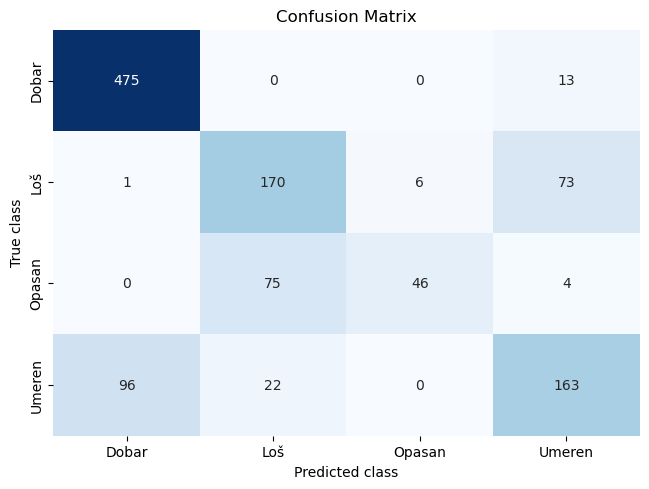

In [71]:
from sklearn.svm import SVC

features,target=df.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

clf = SVC(kernel='rbf',decision_function_shape='ovo') #ovr ili ovo

clf.fit(features_train, target_train)

target_predicted = clf.predict(features_test)

report_svc=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_svc)
conf_matrix_svc=createConfusionMatrix(target_test,target_predicted)

* Generalno dobri rezultati za klasu "Dobar"
* Odziv za klasu "Opasan" je skoro 1, dakle veliki broj tačnih predviđanja
* Klasa "Loš" je imala niže vrednosti za odziv i F1
* *Zaključak:* Model je dao bolje rezultate od Dummy Classifier-a i Logistic Regression, ali ne i od Random Forest-a

### Multinomial Naive Bayes

,precision,recall,f1-score,support
Dobar,0.871102,0.865702,0.868394,484.0
Loš,0.306533,0.245968,0.272931,248.0
Opasan,0.372414,0.432000,0.400000,125.0
Umeren,0.496795,0.553571,0.523649,280.0
macro avg,0.511711,0.524310,0.516243,1137.0
weighted avg,0.600957,0.605981,0.602121,1137.0
accuracy,NaN,NaN,0.605981,NaN


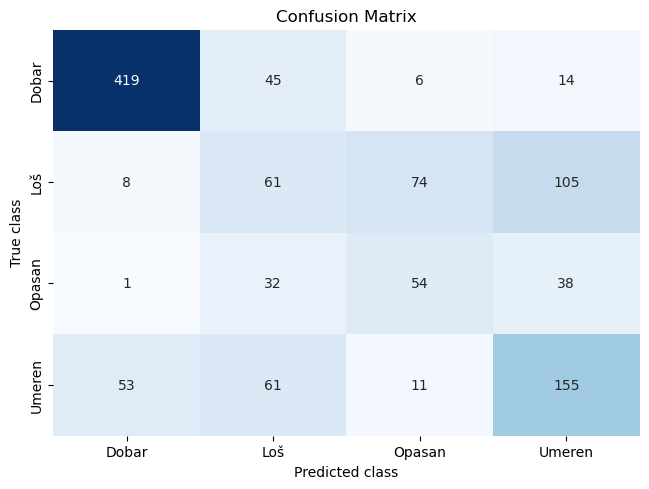

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay


#Uklanjanje redova koje imaju negativne vrednosti karakteristika
df_cleaned = df[(df >= 0).all(axis=1)]

features,target=df_cleaned.drop('Kvalitet_Vazduha',axis=1),df_cleaned['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

nb = MultinomialNB()

nb.fit(features_train, target_train)

target_predicted = nb.predict(features_test)

report_nb=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_nb)
conf_matrix_nb=createConfusionMatrix(target_test,target_predicted)

* Izuzetno loš odziv za klasu "Opasan", svega jedno tačno predviđanje
* F1 rezultat za klasu "Opasan" je veoma niska
* Slaba robusnost kod nebalansiranih skupova podataka
* *Zaključak:* Model je dao veoma loše rezultate, jedva nešto bolji od Dummy Classifier-a

### KNN (K-Nearest Neighbors)

,precision,recall,f1-score,support
Dobar,0.878676,0.979508,0.926357,488.0
Loš,0.671329,0.768000,0.716418,250.0
Opasan,0.819672,0.400000,0.537634,125.0
Umeren,0.770751,0.693950,0.730337,281.0
macro avg,0.785107,0.710365,0.727686,1144.0
weighted avg,0.800408,0.799825,0.789856,1144.0
accuracy,NaN,NaN,0.799825,NaN


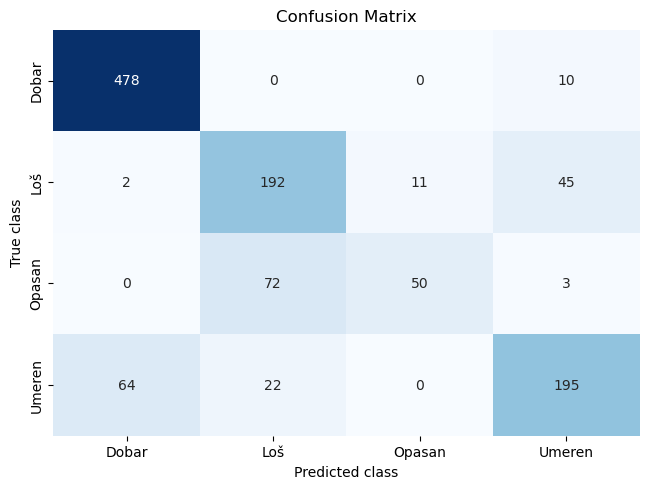

In [73]:
from sklearn.neighbors import KNeighborsClassifier

features,target=df.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')

knn.fit(features_train, target_train)

target_predicted = knn.predict(features_test)

report_knn=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_knn)
conf_matrix_knn=createConfusionMatrix(target_test,target_predicted)

,precision,recall,f1-score,support
Dobar,0.701544,0.838115,0.763772,488.0
Loš,0.500000,0.548000,0.522901,250.0
Opasan,0.583333,0.336000,0.426396,125.0
Umeren,0.423256,0.323843,0.366935,281.0
macro avg,0.552033,0.511490,0.520001,1144.0
weighted avg,0.576228,0.593531,0.576796,1144.0
accuracy,NaN,NaN,0.593531,NaN


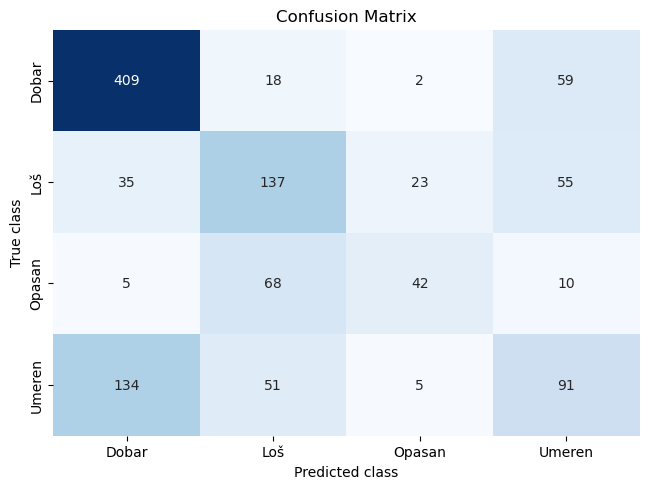

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

features,target=df.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

pca = PCA(n_components=2)
features_train_pca = pca.fit_transform(features_train)
features_test_pca = pca.transform(features_test)

knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')

knn.fit(features_train_pca, target_train)

target_predicted = knn.predict(features_test_pca)

report_knn_pca=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_knn_pca)
conf_matrix_knn_pca=createConfusionMatrix(target_test,target_predicted)

* Odziv, preciznost i F1 za klasu 'Dobar' su visoki, dok je za ostale klase vrednost ovih rezultata manja
* Uvođenjem PCA je došlo do smanjenja kvaliteta predikcije, usled velikog raspona vrednosti atributa
* *Zaključak:* Ovaj model je dao bolje rezultate od nekih drugih, ali uz lošu predikciju klasa "Loš" i "Opasan"


### Pregled modela

* **Random Forest** dao najbolje performanse po svima klasama, kao i koliko-toliko pristojne rezultate za "Opasan" klasu
* "Dobar" i "Umeren" klase su klasifikovane sa visokom tačnošću kod svih modela usled velike podrške
* Klasa "Opasan" se pokazala kao najproblematičnija usled malog broja primera - svi modeli imaju nizak odziv i F1-score

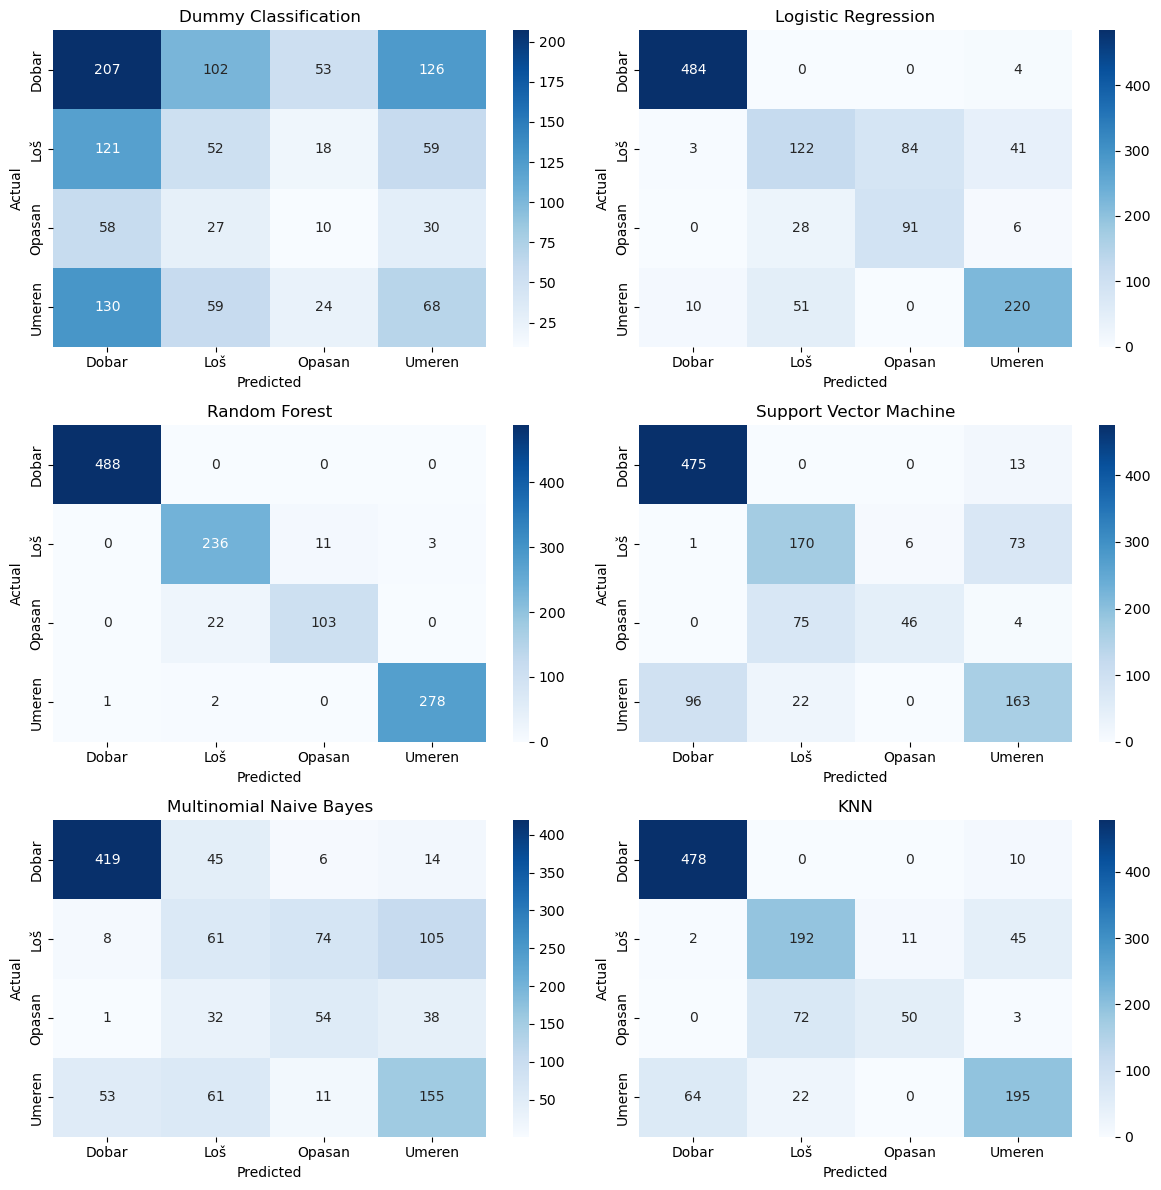

In [75]:
conf_matrixs = {"Dummy Classification":conf_matrix_dummy, "Logistic Regression":conf_matrix_lr,"Random Forest":conf_matrix_rf,
                "Support Vector Machine":conf_matrix_svc,"Multinomial Naive Bayes":conf_matrix_nb,"KNN":conf_matrix_knn}

fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3 reda x 2 kolone
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Modeli sa transformacijom

### MinMax i Standard transofrmacija

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

std_scaler = StandardScaler()
features=df.drop('Kvalitet_Vazduha',axis=1)

data_scalled = std_scaler.fit_transform(features)
df_std = pd.DataFrame(data_scalled, columns=features.columns, index=features.index)
df_std['Kvalitet_Vazduha']=df['Kvalitet_Vazduha']

minmax_scaler = MinMaxScaler()
data_scalled = minmax_scaler.fit_transform(features)
df_minmax = pd.DataFrame(data_scalled, columns=features.columns, index=features.index)
df_minmax['Kvalitet_Vazduha']=df['Kvalitet_Vazduha']

### Logistic Regression

,precision,recall,f1-score,support
Dobar,0.991870,1.000000,0.995918,488.0
Loš,0.883117,0.816000,0.848233,250.0
Opasan,0.800000,0.864000,0.830769,125.0
Umeren,0.933566,0.950178,0.941799,281.0
macro avg,0.902138,0.907544,0.904180,1144.0
weighted avg,0.932818,0.932692,0.932306,1144.0
accuracy,NaN,NaN,0.932692,NaN


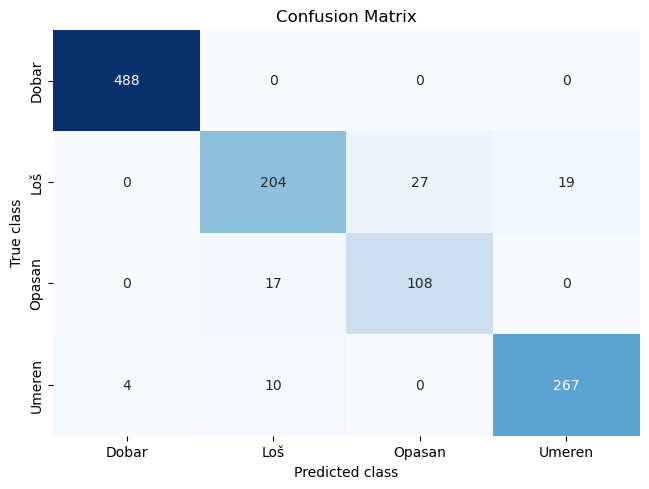

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features,target=df_std.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target) 

# Fit logistic regression (multi-class)
model = LogisticRegression(solver='saga',max_iter=5000, class_weight='balanced',random_state=0)
model.fit(features_train, target_train)

# Predictions
target_predicted = model.predict(features_test)

# Evaluation
report_lr_std=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_lr_std)
conf_matrix_lr_std = createConfusionMatrix(target_test,target_predicted)

,precision,recall,f1-score,support
Dobar,0.981891,1.000000,0.990863,488.0
Loš,0.884444,0.796000,0.837895,250.0
Opasan,0.794118,0.864000,0.827586,125.0
Umeren,0.923077,0.939502,0.931217,281.0
macro avg,0.895883,0.899875,0.896890,1144.0
weighted avg,0.925632,0.925699,0.924943,1144.0
accuracy,NaN,NaN,0.925699,NaN


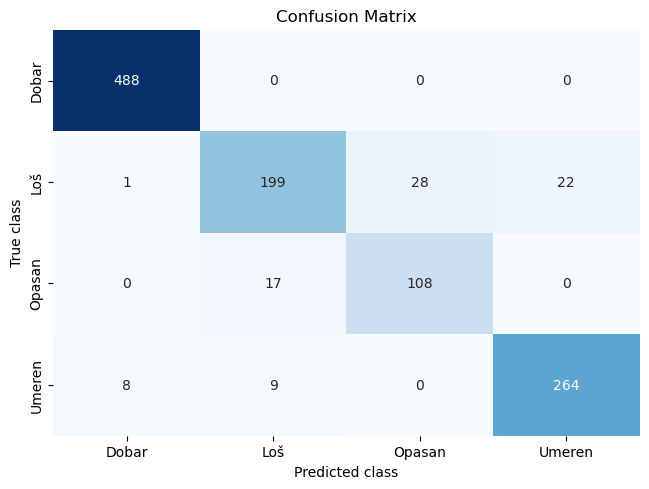

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features,target=df_minmax.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target) 

# Fit logistic regression (multi-class)
model = LogisticRegression(solver='saga',max_iter=5000, class_weight='balanced',random_state=0)
model.fit(features_train, target_train)

# Predictions
target_predicted = model.predict(features_test)

# Evaluation
report_lr_minmax=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_lr_minmax)
conf_matrix_lr_minmax = createConfusionMatrix(target_test,target_predicted)

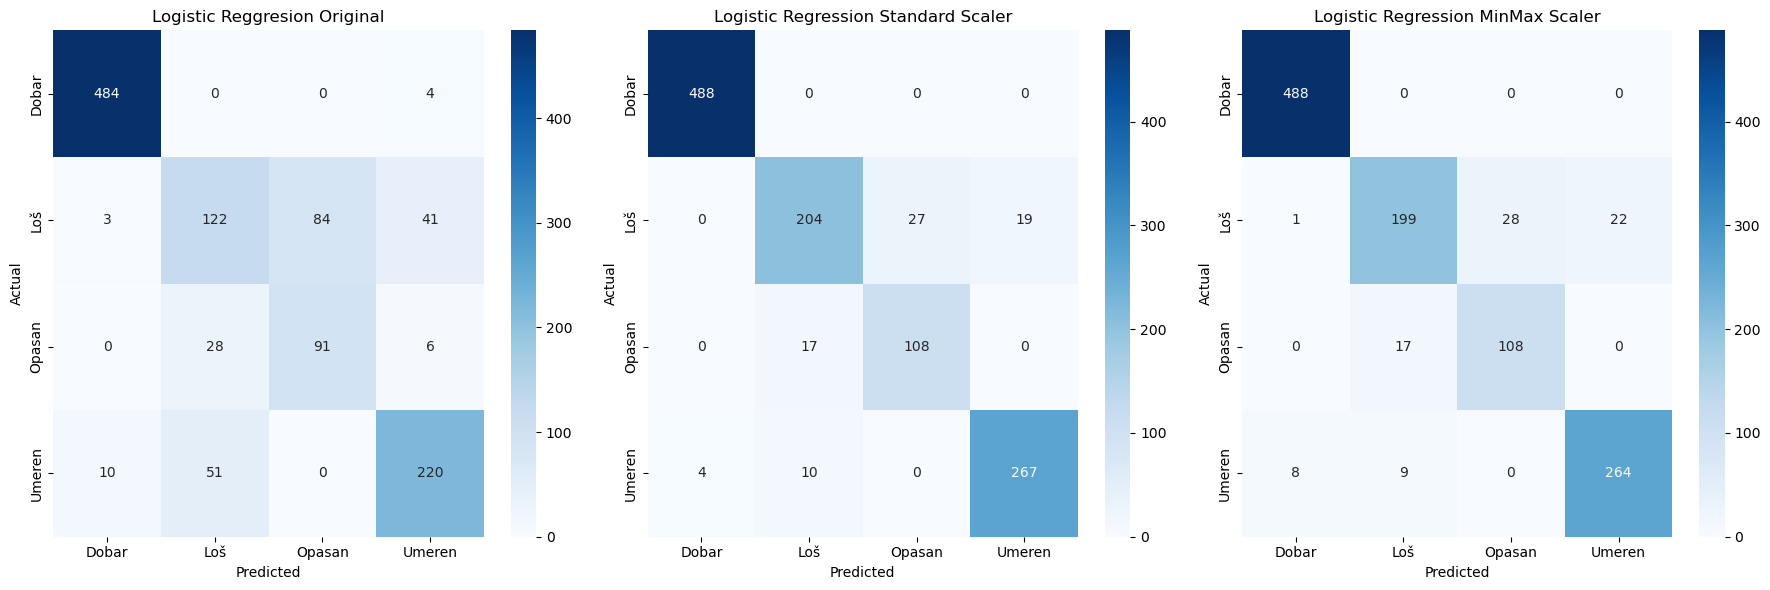

In [79]:
conf_matrixs = {"Logistic Reggresion Original":conf_matrix_lr, "Logistic Regression Standard Scaler":conf_matrix_lr_std,"Logistic Regression MinMax Scaler":conf_matrix_lr_minmax}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 reda x 1 kolona
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [80]:
showReports(dfs=[report_lr, report_lr_std, report_lr_minmax],titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.973843,0.991803,0.982741,488.0
Loš,0.606965,0.488000,0.541020,250.0
Opasan,0.520000,0.728000,0.606667,125.0
Umeren,0.811808,0.782918,0.797101,281.0
macro avg,0.728154,0.747680,0.731882,1144.0
weighted avg,0.804279,0.801573,0.799521,1144.0
accuracy,NaN,NaN,0.801573,NaN
,precision,recall,f1-score,support
Dobar,0.991870,1.000000,0.995918,488.0
Loš,0.883117,0.816000,0.848233,250.0


* Logistic Regression nad skaliranim skupom podataka dao je bolje rezultate
* Preciznost svih klasa se povećala kod Standardnog skaliranja, dok se dodatno povećala kod MinMax skaliranja
* Značajno poboljšanje detekcije klase "Loš" kod oba skaliranja
* *Zaključak:* Modifikacija skupa podataka ovom modelu omogućila bolju predikciju

### Random Forest

,precision,recall,f1-score,support
Dobar,0.997955,1.000000,0.998976,488.0
Loš,0.907692,0.944000,0.925490,250.0
Opasan,0.903509,0.824000,0.861925,125.0
Umeren,0.989324,0.989324,0.989324,281.0
macro avg,0.949620,0.939331,0.943929,1144.0
weighted avg,0.965790,0.965909,0.965571,1144.0
accuracy,NaN,NaN,0.965909,NaN


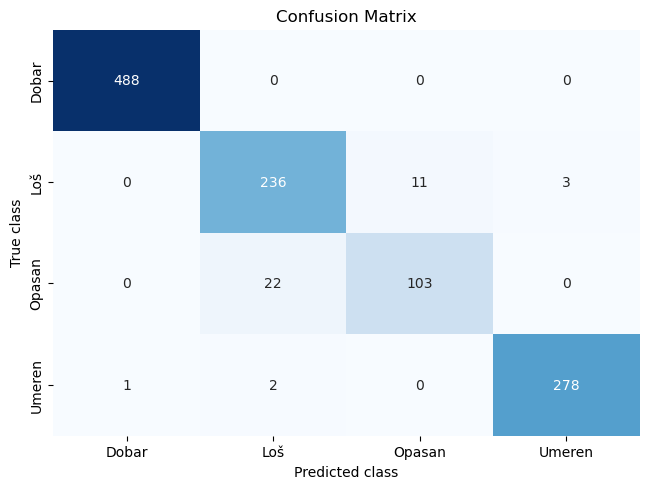

In [81]:
from sklearn.ensemble import RandomForestClassifier

features,target=df_std.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=0
)
rf.fit(features_train, target_train)
target_predicted = rf.predict(features_test)

report_rf_std=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_rf_std)
conf_matrix_rf_std=createConfusionMatrix(target_test,target_predicted)

,precision,recall,f1-score,support
Dobar,0.997955,1.000000,0.998976,488.0
Loš,0.907692,0.944000,0.925490,250.0
Opasan,0.903509,0.824000,0.861925,125.0
Umeren,0.989324,0.989324,0.989324,281.0
macro avg,0.949620,0.939331,0.943929,1144.0
weighted avg,0.965790,0.965909,0.965571,1144.0
accuracy,NaN,NaN,0.965909,NaN


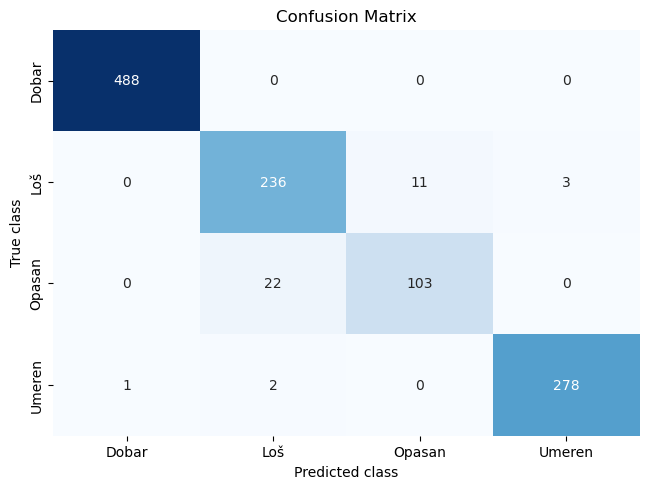

In [82]:
from sklearn.ensemble import RandomForestClassifier

features,target=df_minmax.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=0
)
rf.fit(features_train, target_train)
target_predicted = rf.predict(features_test)

report_rf_minmax=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_rf_minmax)
conf_matrix_rf_minmax=createConfusionMatrix(target_test,target_predicted)

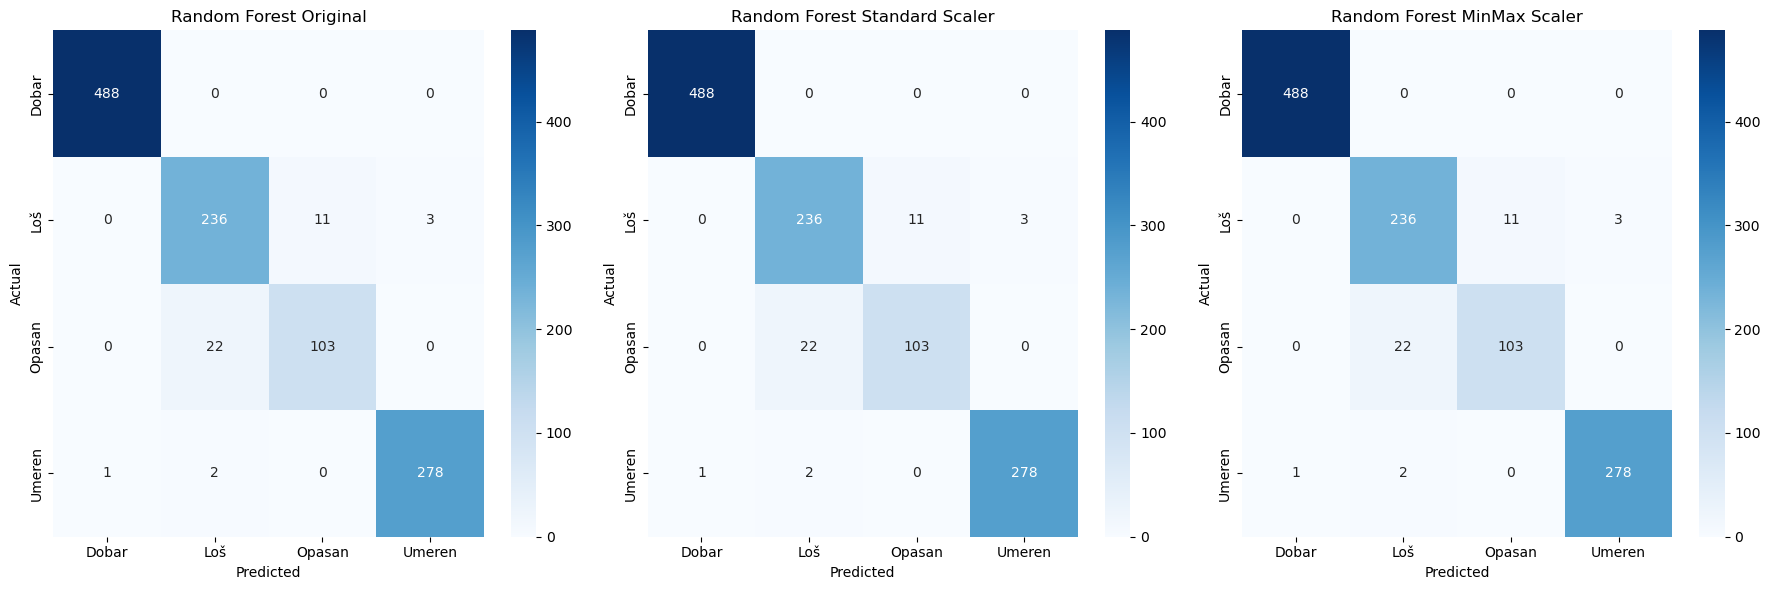

In [83]:
conf_matrixs = {"Random Forest Original":conf_matrix_rf, "Random Forest Standard Scaler":conf_matrix_rf_std,"Random Forest MinMax Scaler":conf_matrix_rf_minmax}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 reda x 1 kolona
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [84]:
showReports(dfs=[report_rf, report_rf_std, report_rf_minmax],titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.997955,1.000000,0.998976,488.0
Loš,0.907692,0.944000,0.925490,250.0
Opasan,0.903509,0.824000,0.861925,125.0
Umeren,0.989324,0.989324,0.989324,281.0
macro avg,0.949620,0.939331,0.943929,1144.0
weighted avg,0.965790,0.965909,0.965571,1144.0
accuracy,NaN,NaN,0.965909,NaN
,precision,recall,f1-score,support
Dobar,0.997955,1.000000,0.998976,488.0
Loš,0.907692,0.944000,0.925490,250.0


* Odziv kod klase "Loš" je blago porastao dok se drugi rezultati gotovo nisu menjali
* *Zaključak:* Random Forest je dao najbolje rezultate predikcije, s time da se može dodatno poboljšati uz MinMax skaliranje

### Support Vector Machine

,precision,recall,f1-score,support
Dobar,0.993890,1.000000,0.996936,488.0
Loš,0.894309,0.880000,0.887097,250.0
Opasan,0.865546,0.824000,0.844262,125.0
Umeren,0.951389,0.975089,0.963093,281.0
macro avg,0.926284,0.919772,0.922847,1144.0
weighted avg,0.947665,0.948427,0.947938,1144.0
accuracy,NaN,NaN,0.948427,NaN


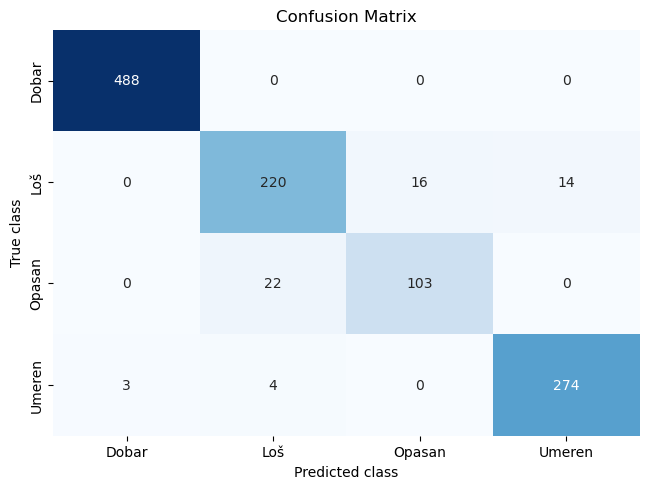

In [85]:
from sklearn.svm import SVC

features,target=df_std.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

clf = SVC(kernel='rbf',decision_function_shape='ovo') #ovr ili ovo

clf.fit(features_train, target_train)

target_predicted = clf.predict(features_test)

report_svc_std=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_svc_std)
conf_matrix_svc_std=createConfusionMatrix(target_test,target_predicted)

,precision,recall,f1-score,support
Dobar,0.993890,1.000000,0.996936,488.0
Loš,0.887500,0.852000,0.869388,250.0
Opasan,0.836066,0.816000,0.825911,125.0
Umeren,0.941581,0.975089,0.958042,281.0
macro avg,0.914759,0.910772,0.912569,1144.0
weighted avg,0.940547,0.941434,0.940822,1144.0
accuracy,NaN,NaN,0.941434,NaN


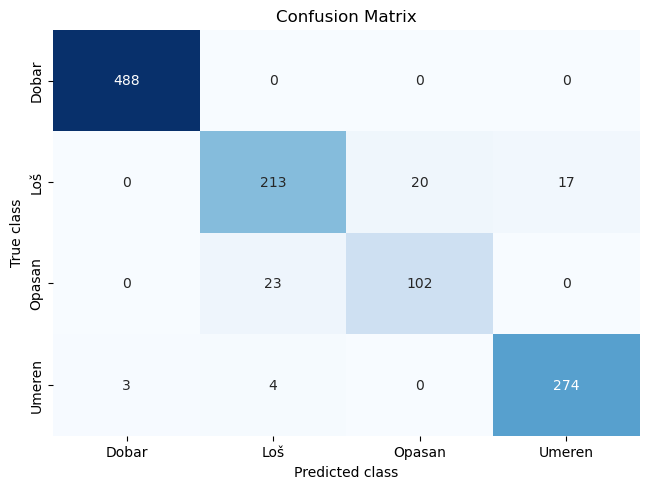

In [86]:
from sklearn.svm import SVC

features,target=df_minmax.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

clf = SVC(kernel='rbf',decision_function_shape='ovo') #ovr ili ovo

clf.fit(features_train, target_train)

target_predicted = clf.predict(features_test)

report_svc_minmax=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_svc_minmax)
conf_matrix_svc_minmax=createConfusionMatrix(target_test,target_predicted)

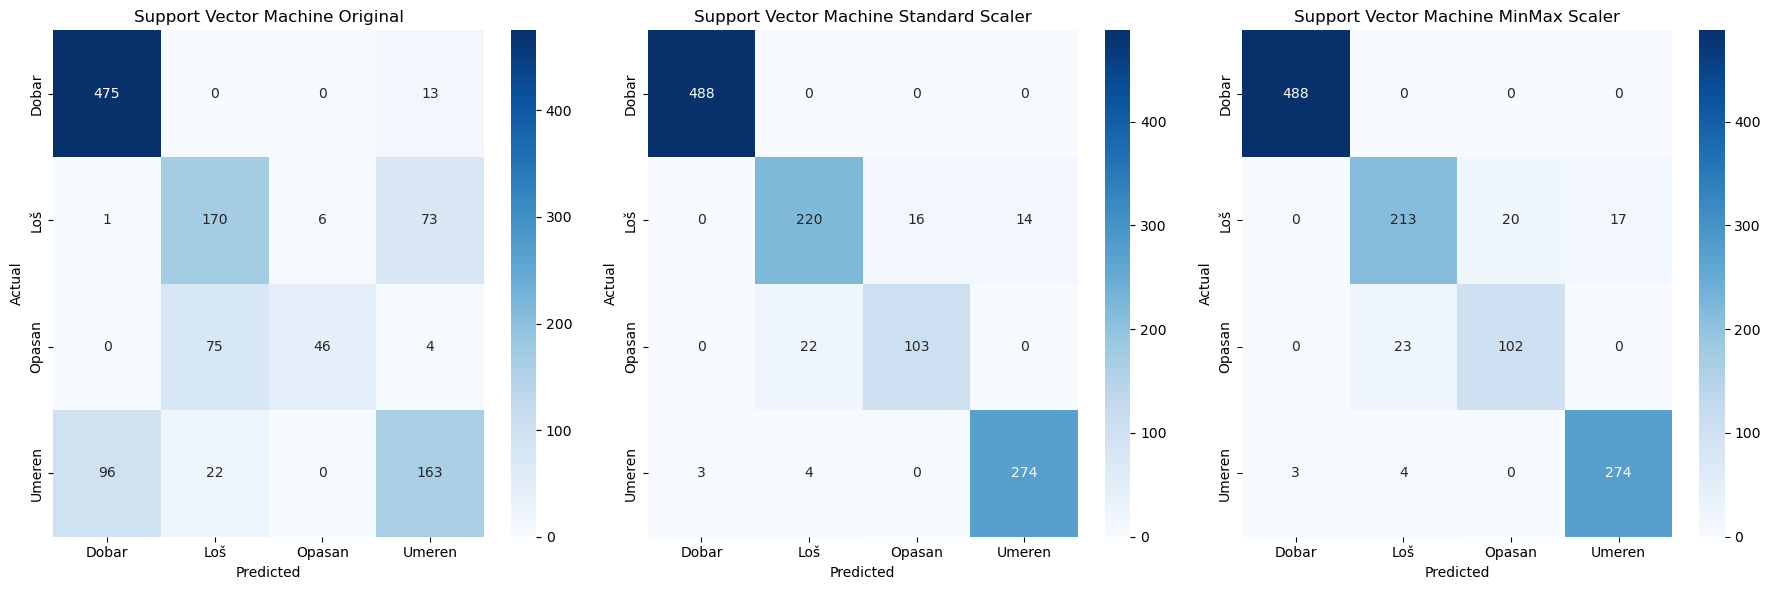

In [87]:
conf_matrixs = {"Support Vector Machine Original":conf_matrix_svc, "Support Vector Machine Standard Scaler":conf_matrix_svc_std,"Support Vector Machine MinMax Scaler":conf_matrix_svc_minmax}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 reda x 1 kolona
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [88]:
showReports(dfs=[report_svc, report_svc_std, report_svc_minmax],titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.830420,0.973361,0.896226,488.0
Loš,0.636704,0.680000,0.657640,250.0
Opasan,0.884615,0.368000,0.519774,125.0
Umeren,0.644269,0.580071,0.610487,281.0
macro avg,0.749002,0.650358,0.671032,1144.0
weighted avg,0.748284,0.746503,0.732768,1144.0
accuracy,NaN,NaN,0.746503,NaN
,precision,recall,f1-score,support
Dobar,0.993890,1.000000,0.996936,488.0
Loš,0.894309,0.880000,0.887097,250.0


* Support Vector Machine je postigao značajno bolje rezultate nakon primene skaliranja nego pri radu sa originalnim skupom podataka
* Odziv kod klasa "Opasan" i "Loš" se dosta povećao u odnosu na primenu ovog modela nad originalnim skupom podataka
* Ostaje problem niskog odziva klase "Opasan", doduše prilikom skaliranja pogrešno je identifikovao kao klasa "Loš" što možemo smatrati da nije velika greška
* *Zaključak:* Model je imao veliko poboljšanje performansi usled skaliranja podataka, mada ostaje problem tačne detekcije klase "Opasan"

### Multinomial Naive Bayes

,precision,recall,f1-score,support
Dobar,0.531012,1.000000,0.693674,488.0
Loš,0.429530,0.256000,0.320802,250.0
Opasan,1.000000,0.000000,0.000000,125.0
Umeren,0.000000,0.000000,0.000000,281.0
macro avg,0.490136,0.314000,0.253619,1144.0
weighted avg,0.429647,0.482517,0.366008,1144.0
accuracy,NaN,NaN,0.482517,NaN


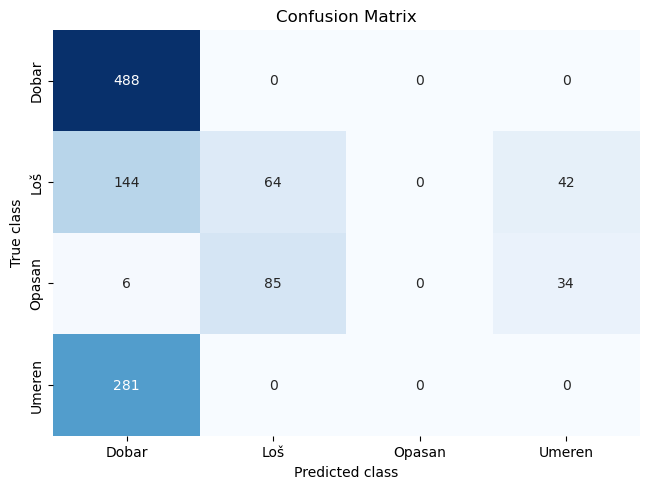

In [89]:
from sklearn.naive_bayes import MultinomialNB

features,target=df_minmax.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

nb = MultinomialNB()
nb.fit(features_train, target_train)

target_predicted = nb.predict(features_test)

report_nb_minmax=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_nb_minmax)
conf_matrix_nb_minmax=createConfusionMatrix(target_test,target_predicted)

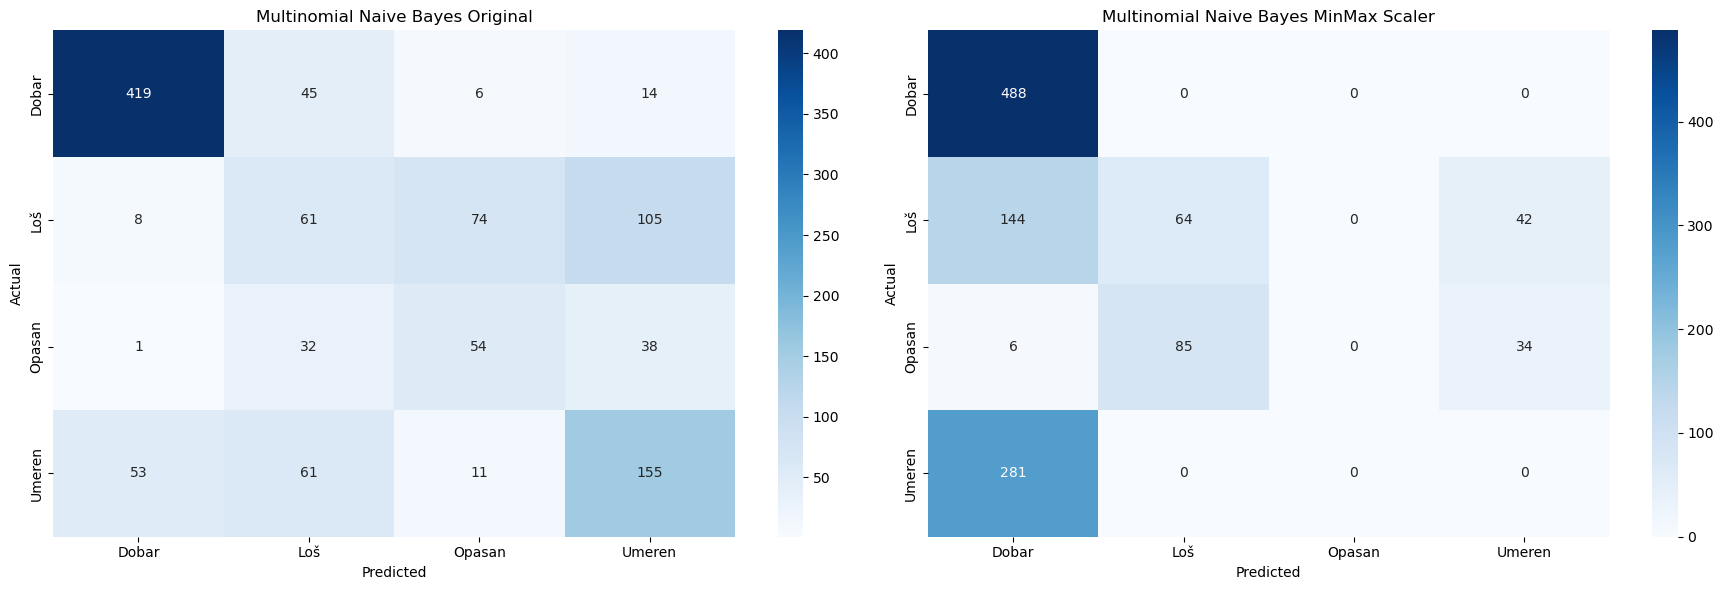

In [90]:
conf_matrixs = {"Multinomial Naive Bayes Original":conf_matrix_nb, "Multinomial Naive Bayes MinMax Scaler":conf_matrix_nb_minmax}
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 3 reda x 1 kolona
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [91]:
showReports(dfs=[report_nb, report_nb_minmax],titles=['Original','MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.871102,0.865702,0.868394,484.0
Loš,0.306533,0.245968,0.272931,248.0
Opasan,0.372414,0.432000,0.400000,125.0
Umeren,0.496795,0.553571,0.523649,280.0
macro avg,0.511711,0.524310,0.516243,1137.0
weighted avg,0.600957,0.605981,0.602121,1137.0
accuracy,NaN,NaN,0.605981,NaN
,precision,recall,f1-score,support
Dobar,0.531012,1.000000,0.693674,488.0
Loš,0.429530,0.256000,0.320802,250.0


* Primena Standard Scaler-a nije bila moguća budući da Multinomial Naive Bayes radi samo sa pozitivnim vrednostima
* Odziv i f1 je kod klasa "Opasan" i "Loš" nula, što znači da nije detektovan nijedan objekat ove klase
* *Zaključak:* Ovakav model je do sada dao najlošije rezultate nakon što se primenilo skaliranje skupa podataka

### KNN (K-Nearest Neighbors)

,precision,recall,f1-score,support
Dobar,0.977956,1.000000,0.988855,488.0
Loš,0.820225,0.876000,0.847195,250.0
Opasan,0.942529,0.656000,0.773585,125.0
Umeren,0.910653,0.943060,0.926573,281.0
macro avg,0.912841,0.868765,0.884052,1144.0
weighted avg,0.923084,0.921329,0.919078,1144.0
accuracy,NaN,NaN,0.921329,NaN


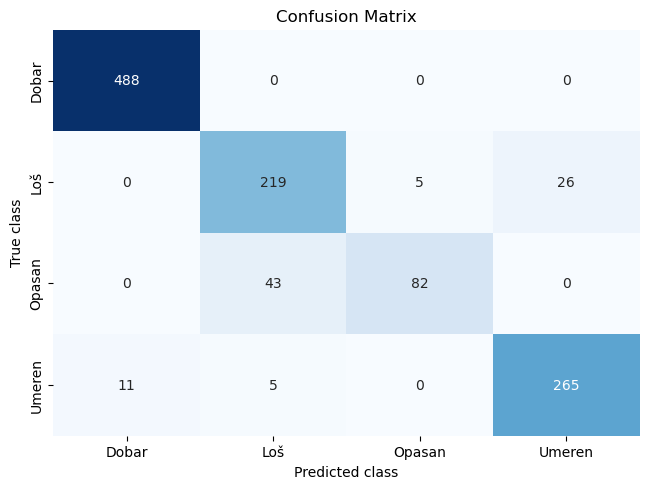

In [92]:
from sklearn.neighbors import KNeighborsClassifier

features,target=df_std.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')

knn.fit(features_train, target_train)

target_predicted = knn.predict(features_test)

report_knn_std=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_knn_std)
conf_matrix_knn_std=createConfusionMatrix(target_test,target_predicted)

,precision,recall,f1-score,support
Dobar,0.985859,1.000000,0.992879,488.0
Loš,0.833948,0.904000,0.867562,250.0
Opasan,0.965517,0.672000,0.792453,125.0
Umeren,0.927835,0.960854,0.944056,281.0
macro avg,0.928290,0.884214,0.899238,1144.0
weighted avg,0.936187,0.933566,0.931601,1144.0
accuracy,NaN,NaN,0.933566,NaN


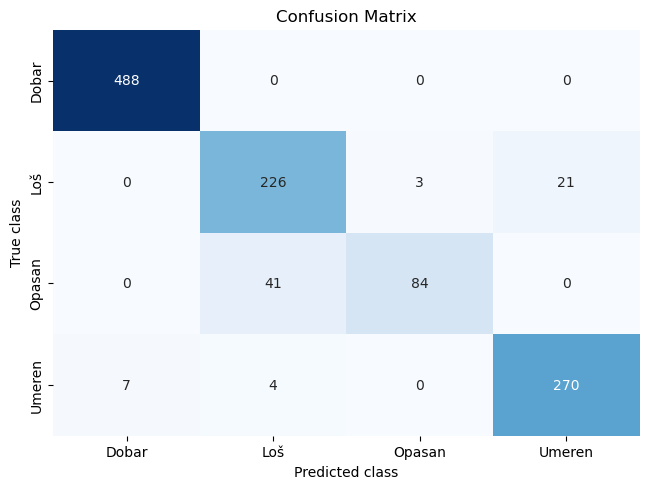

In [93]:
from sklearn.neighbors import KNeighborsClassifier

features,target=df_minmax.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')

knn.fit(features_train, target_train)

target_predicted = knn.predict(features_test)

report_knn_minmax=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_knn_minmax)
conf_matrix_knn_minmax=createConfusionMatrix(target_test,target_predicted)

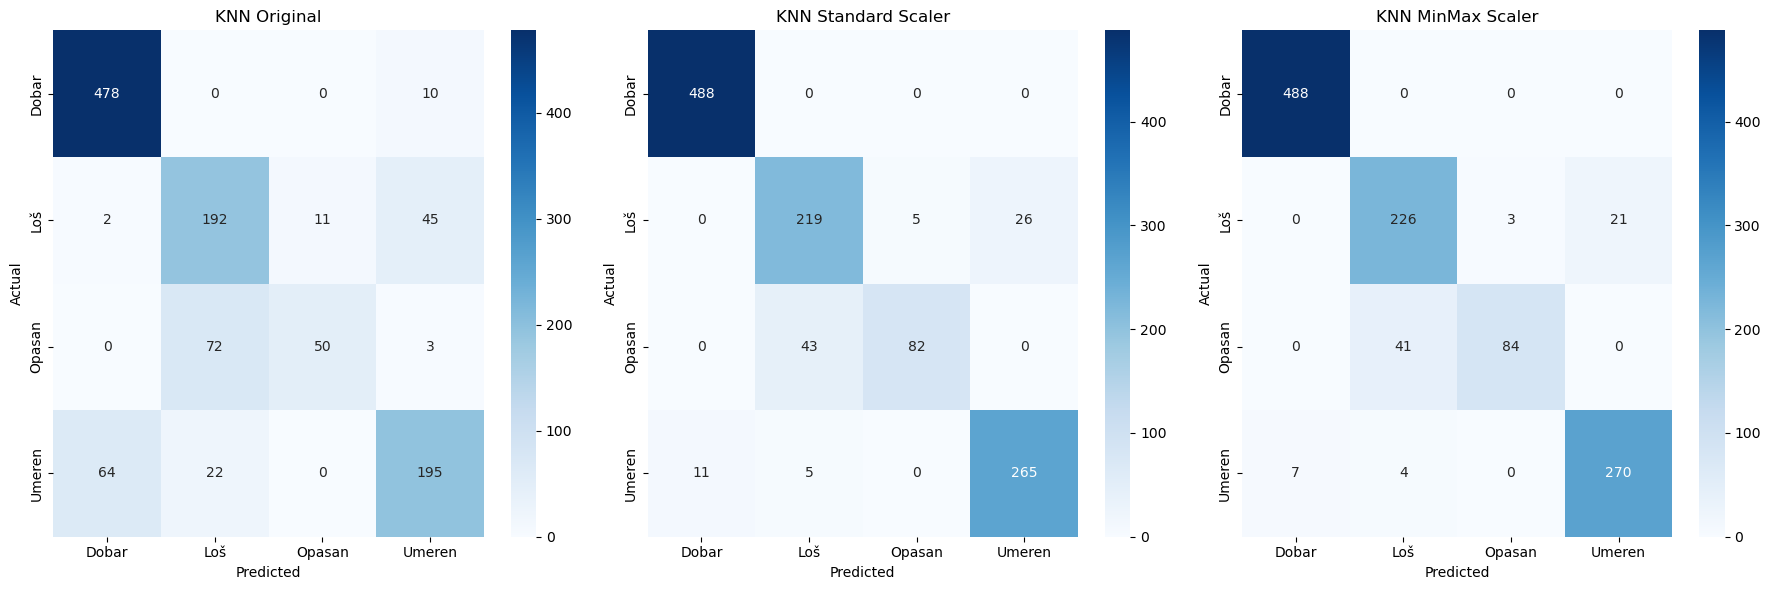

In [94]:
conf_matrixs = {"KNN Original":conf_matrix_knn, "KNN Standard Scaler":conf_matrix_knn_std,"KNN MinMax Scaler":conf_matrix_knn_minmax}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 reda x 1 kolona
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [95]:
showReports(dfs=[report_knn, report_knn_std, report_knn_minmax],titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.878676,0.979508,0.926357,488.0
Loš,0.671329,0.768000,0.716418,250.0
Opasan,0.819672,0.400000,0.537634,125.0
Umeren,0.770751,0.693950,0.730337,281.0
macro avg,0.785107,0.710365,0.727686,1144.0
weighted avg,0.800408,0.799825,0.789856,1144.0
accuracy,NaN,NaN,0.799825,NaN
,precision,recall,f1-score,support
Dobar,0.977956,1.000000,0.988855,488.0
Loš,0.820225,0.876000,0.847195,250.0


* Uvođenjem skaliranja skupa podataka odziv klase "Dobar" je dostigao 1, čime su sve predikcije tačne
* Odziv klasa "Loš" i "Opasan" se povećao, pri čemu je malo veće povećanje prilikom pirmene MinMax skaliranja
* Opšta tačnost predikcije je dostigla nivo Random Forest modela, ali je detekcija klase "Opasan" ipak malo slabija
* *Zaključak:* Uveđenje skaliranja kod ovog modela je dovelo do poboljšanja rezultata, čime je ovaj model postao drugi najbolji od do sada testiranih modela

### KNN PCA

,precision,recall,f1-score,support
Dobar,0.968064,0.993852,0.980789,488.0
Loš,0.805147,0.876000,0.839080,250.0
Opasan,0.884615,0.736000,0.803493,125.0
Umeren,0.917603,0.871886,0.894161,281.0
macro avg,0.893857,0.869435,0.879381,1144.0
weighted avg,0.910949,0.909965,0.909170,1144.0
accuracy,NaN,NaN,0.909965,NaN


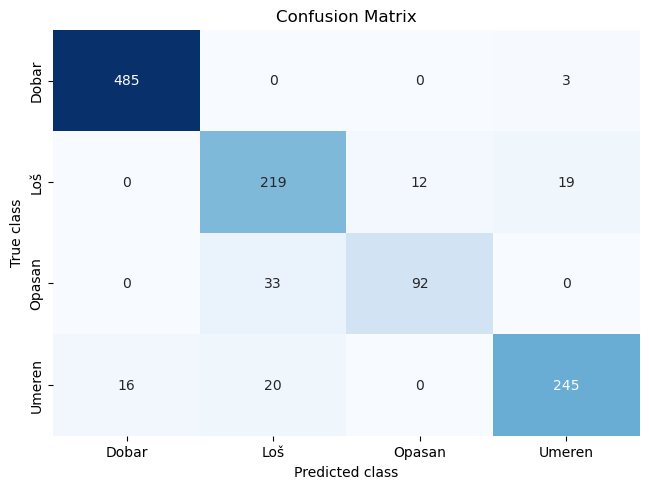

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

features,target=df_std.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

pca = PCA(n_components=2)
features_train_pca = pca.fit_transform(features_train)
features_test_pca = pca.transform(features_test)

knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')

knn.fit(features_train_pca, target_train)

target_predicted = knn.predict(features_test_pca)

report_knn_pca_std=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_knn_pca_std)
conf_matrix_knn_pca_std=createConfusionMatrix(target_test,target_predicted)

,precision,recall,f1-score,support
Dobar,0.975855,0.993852,0.984772,488.0
Loš,0.762411,0.860000,0.808271,250.0
Opasan,0.878788,0.696000,0.776786,125.0
Umeren,0.902256,0.854093,0.877514,281.0
macro avg,0.879827,0.850986,0.861835,1144.0
weighted avg,0.900527,0.897727,0.897129,1144.0
accuracy,NaN,NaN,0.897727,NaN


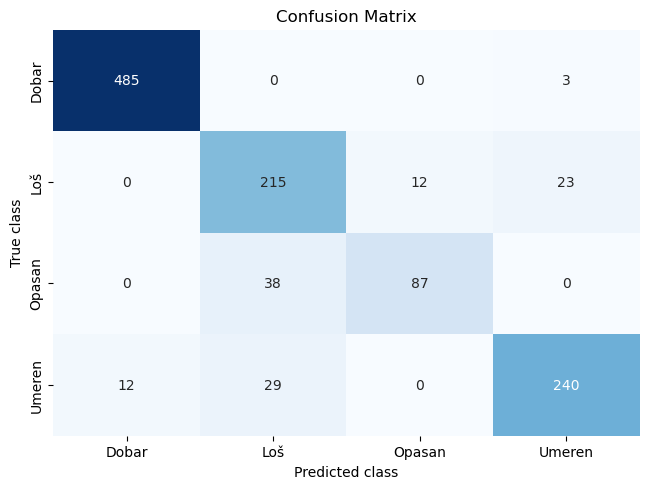

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

features,target=df_minmax.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

pca = PCA(n_components=2)
features_train_pca = pca.fit_transform(features_train)
features_test_pca = pca.transform(features_test)

knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')

knn.fit(features_train_pca, target_train)

target_predicted = knn.predict(features_test_pca)

report_knn_pca_minmax=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_knn_pca_minmax)
conf_matrix_knn_pca_minmax=createConfusionMatrix(target_test,target_predicted)

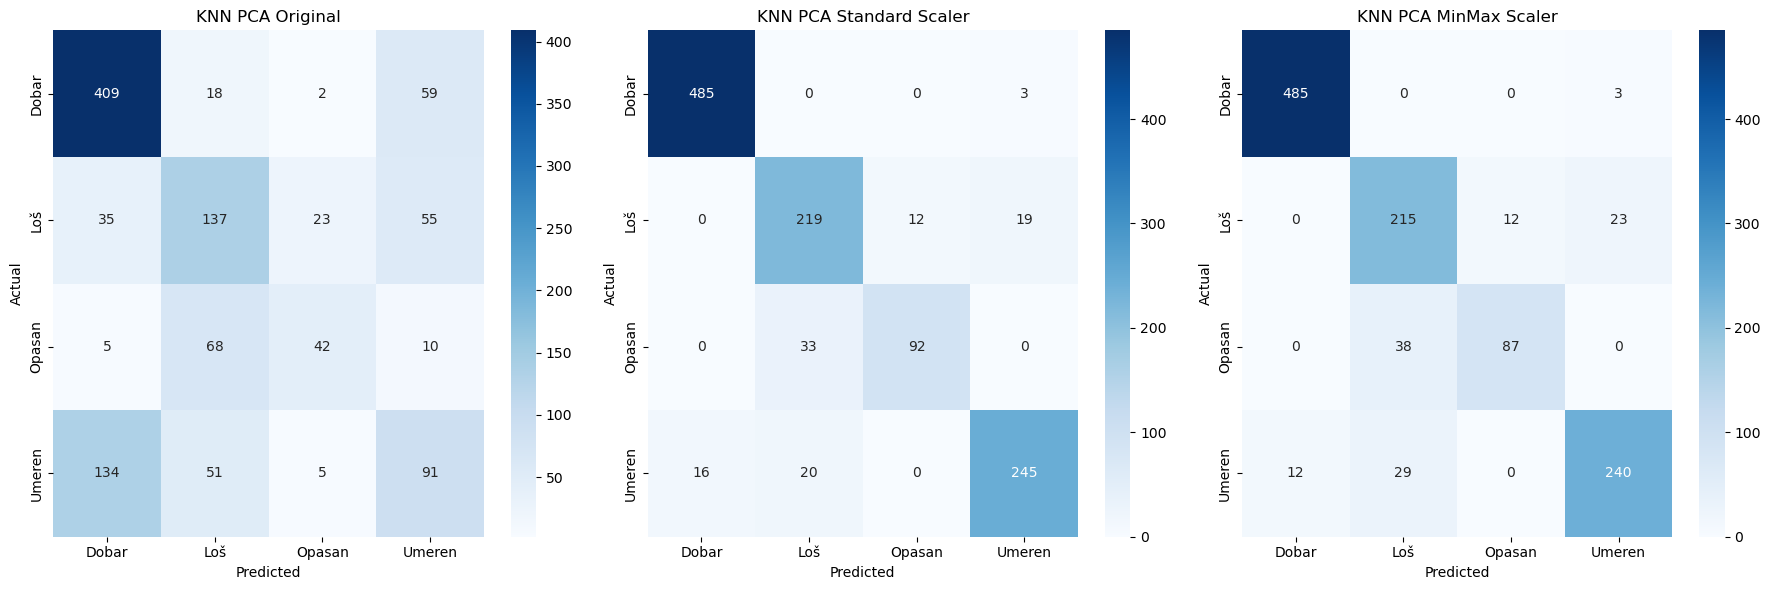

In [98]:
conf_matrixs = {"KNN PCA Original":conf_matrix_knn_pca, "KNN PCA Standard Scaler":conf_matrix_knn_pca_std,"KNN PCA MinMax Scaler":conf_matrix_knn_pca_minmax}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 reda x 1 kolona
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [99]:
showReports(dfs=[report_knn_pca, report_knn_pca_std, report_knn_pca_minmax],titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.701544,0.838115,0.763772,488.0
Loš,0.500000,0.548000,0.522901,250.0
Opasan,0.583333,0.336000,0.426396,125.0
Umeren,0.423256,0.323843,0.366935,281.0
macro avg,0.552033,0.511490,0.520001,1144.0
weighted avg,0.576228,0.593531,0.576796,1144.0
accuracy,NaN,NaN,0.593531,NaN
,precision,recall,f1-score,support
Dobar,0.968064,0.993852,0.980789,488.0
Loš,0.805147,0.876000,0.839080,250.0


* Uvođenje skaliranja podataka je dovelo do značajnog poboljšanja predikcije na nivou svih klasa
* Malo bolje rezultate je dalo MinMax skaliranje u odnosu na Standardn skaler
* U odnosu na original, klasa "Opasan" sada ima odziv 0.71 dok je ranije imala svega 0.32 
* *Zaključak:* Skaliranje je dosta pomoglo KNN modelu sa PCA redukcijom dimenzionalnosti, ali je ipak osnovni KNN dao malo bolje rezultate